In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

In [3]:
data_path = ("http://archive.ics.uci.edu/ml/machine-learning-databases/"
             "heart-disease/processed.cleveland.data")
df = pd.read_csv(data_path)

# Define the features and the outcome.
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0.
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

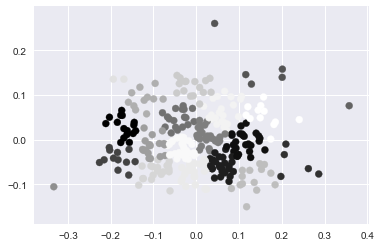

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0       5   7
1      17  13
2      16   7
3       6  16
4       2   0
5       5  14
6       8   8
7       2  12
8      10   1
9       9   8
10      0   1
11     10  16
12     10   8
13      0   1
14      5   0
15      8   4
16      0   5
17      5  21
18      8  18
19     13   3


In [15]:
n_clusters = 20
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=n_clusters, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

In [16]:
# Each batch will be made up of 20 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=n_clusters,
    batch_size=200)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)


# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(predict_mini, y))

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0       8  17
1       5   1
2       7   9
3       6   5
4       9   3
5       6   0
6       2   0
7      12   7
8       7   7
9      11   6
10      3  13
11      5  15
12     14  10
13      5  19
14     11   4
15     14   9
16      7  17
17      0   7
18      1  11
19      6   3
Comparing k-means and mini batch k-means solutions:
col_0  0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
row_0                                                                           
0       1   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0   
1       0   0   0   0   0   0   0   0   5   0   0   0   0   0   0   0   0   0   
2       0   7   0   0   0   4   0   0   0   5   0   0   0   0   0   0   0   0   
3       0   0   0   0   0   0   0   0   0  10   0   0   0   0   0   1   0   0   
4       0   0   0   0   0   0   0   0   0   0   1   0   0   0   0  10   0   0   
5       0   0   0   0   0   

If I pick the cluster's assignment based on the majority, the accuracy of my model is about 69% 

In [31]:
# Why not K-NN?

msk = np.random.rand(len(df)) < 0.5

df_train = df[msk]
df_test = df[~msk]

# Define the features and the outcome.
X_train = df_train.iloc[:, :13]
y_train = df_train.iloc[:, 13]

# Replace missing values (marked by ?) with a 0.
X_train = X_train.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y_train = np.where(y_train > 0, 0, 1)


X_test = df_test.iloc[:, :13]
y_test = df_test.iloc[:, 13]

# Replace missing values (marked by ?) with a 0.
X_test = X_test.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y_test = np.where(y_test > 0, 0, 1)

from sklearn.neighbors import KNeighborsClassifier
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

neighbors = KNeighborsClassifier(n_neighbors=1)
neighbors.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [32]:
score = cross_val_score(neighbors, X_train,y_train, cv=5)
print(score)
print(neighbors.score(X_train,y_train))

[ 0.6         0.55172414  0.51724138  0.68965517  0.67857143]
1.0


In [33]:
print(neighbors.score(X_test,y_test))

0.611464968153


In [34]:
y_pred_train = neighbors.predict(X_train)
y_pred_test = neighbors.predict(X_test)

In [35]:
# Classify, storing the result in a new variable.
y_pred_train = neighbors.predict(X_train)
y_pred_test = neighbors.predict(X_test)


# Display our results.
print("Train:Number of mislabeled points out of a total {} points : {}".format(
    X_train.shape[0],
    (y_train != y_pred_train).sum()
))
print("Test: Number of mislabeled points out of a total {} points : {}".format(
    X_test.shape[0],
    (y_test != y_pred_test).sum()
))

Train:Number of mislabeled points out of a total 145 points : 0
Test: Number of mislabeled points out of a total 157 points : 61


In [36]:
# Accuracy is about the same....